In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob
import sys
import os
import time
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
import mpld3
mpld3.enable_notebook()
import pickle
import datetime
import socket
import time
import traceback

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def read_pickle(file, verbose=False):
    if verbose: print('loading from..', file)
    with open(file, 'rb') as f:
        return pickle.load(f)


import logging
logger = logging.getLogger(__name__)

# Configure the logging system
logging.basicConfig(
    level=logging.INFO,  # Set the logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',  # Format of the log messages
    datefmt='%Y-%m-%d %H:%M:%S',  # Format of the timestamp
)
logger = logging.getLogger(__name__)

In [31]:

ac_sim_path = r'../../assetto_corsa_gym'
sys.path.append(os.path.abspath(os.path.join(ac_sim_path)))
from AssettoCorsaEnv.ac_client import Client
from AssettoCorsaEnv.curvature import curvature_splines

# Check racing line

In [32]:
tracks_path = "../../assetto_corsa_gym/tracks/"

In [33]:
ref_line_file = f"{tracks_path}/ks_barcelona-layout_gp-racing_line"

df = pd.read_csv(ref_line_file + ".csv")
file_channels = ["pos_x", "pos_y"]

ts = df[file_channels].values

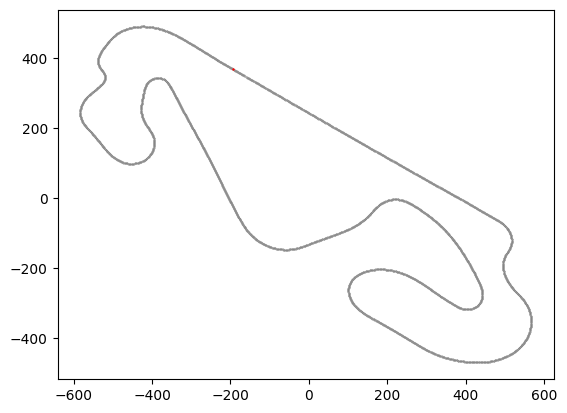

In [34]:
plt.scatter(ts[:,0],  ts[:,1], s=0.1, color="gray")
plt.scatter(ts[0,0],  ts[0,1], s=0.5, color="red")

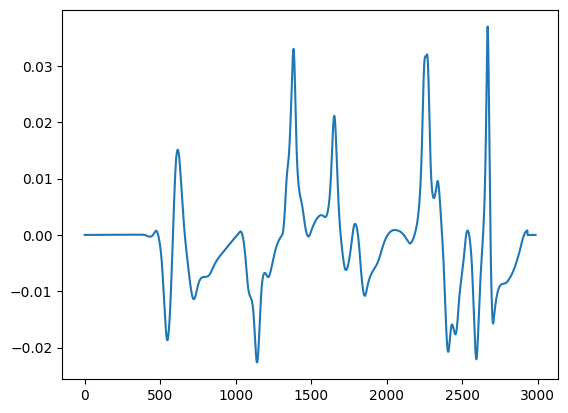

In [35]:
curvature = curvature_splines( ts[:,0],  ts[:,1] , error=1)
curvature[2934:] = 0. # force zero in the last part

curvature = curvature.reshape(-1,1)
plt.plot(curvature)

In [36]:
df = pd.DataFrame(np.concatenate([ts, curvature], axis=1), columns=["pos_x", "pos_y", "curvature"])
df.columns

Index(['pos_x', 'pos_y', 'curvature'], dtype='object')

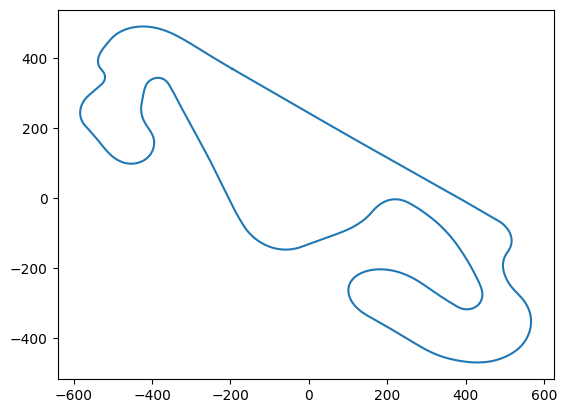

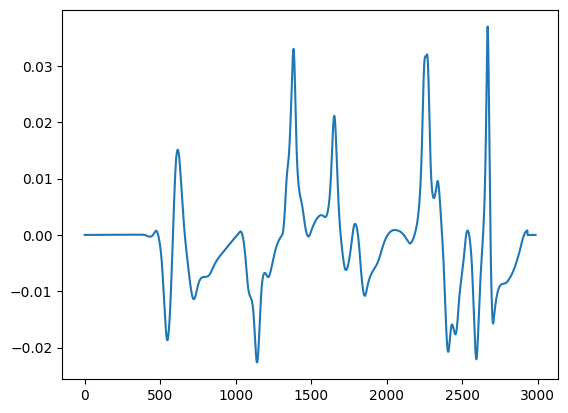

In [37]:
plt.plot(df.pos_x, df.pos_y)
plt.show()

plt.plot(df.curvature)
plt.show()




In [39]:
ref_line_file

'../../assetto_corsa_gym/tracks//ks_barcelona-layout_gp-racing_line'

In [40]:
df.to_csv(ref_line_file + "_fixed.csv", index=False)